<a href="https://colab.research.google.com/github/Halaarav/AML/blob/main/E22011_AML_Experiment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ARAV SOOD**
                                                                
**E22011**


# EXPERIMENT 1:
Compare the variance of output for Knn Model with that of the Decision Tree Model.\
Given, Both are used with default parameters.

In [22]:
#Importing the modules to be used
import pandas as pd
import numpy as np
import random
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

In [33]:
cars = pd.read_csv("https://raw.githubusercontent.com/Halaarav/AML/main/cars.csv",sep=",")  #Importing the Cars Dataset
cars.head()  #To view the first 5 rows and check if the dataset is imported correctly

,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
0,Chevrolet Chevelle Malibu,18.0,8,307.0,130,3504,12.0,70,US
1,Buick Skylark 320,15.0,8,350.0,165,3693,11.5,70,US
2,Plymouth Satellite,18.0,8,318.0,150,3436,11.0,70,US
3,AMC Rebel SST,16.0,8,304.0,150,3433,12.0,70,US
4,Ford Torino,17.0,8,302.0,140,3449,10.5,70,US


## For the Experiment that we are going to perform, we would require 200 different, independent samples each of size 80 from the dataset. Also, we will require a single test input.

> First we need to randomly take out a test input (one single row) otherwise it may get exposed to our model while training when we randomly take 200 samples of the data.



In [34]:
b = random.randint(0,406) #Generating a random number that can take the value of any row in the dataset

In [35]:
test  = cars.sample(1, replace = False, random_state=b) #Taking one row that can be used as our test observation
X_test = test.drop(['Car','MPG','Acceleration','Model','Origin'],axis=1)  #Test Predictors
y_test = test.MPG #Test Target

In [36]:
cars = cars.drop(test.index,axis = 0) #Dropping the test observation from the dataframe.

In [37]:
#Storing the 200 samples in a list called cars_samples.
cars_samples = []
for i in range(1,201):
  cars_samples.append(cars.sample(80,random_state = i))

In [38]:
len(cars_samples) #Hence there are 200 samples in this list.

200

In [39]:
cars_samples              #This list contains 200 samples of shape 80x9.

[                                  Car   MPG  Cylinders  Displacement  \
 362                     Honda Prelude  33.7          4         107.0   
 62               Volkswagen Model 111  27.0          4          97.0   
 321                     Ford Fairmont  26.4          4         140.0   
 92                  Buick Century 350  13.0          8         350.0   
 147                  AMC Matador (sw)  14.0          8         304.0   
 ..                                ...   ...        ...           ...   
 85                   Peugeot 504 (sw)  21.0          4         120.0   
 11   Chevrolet Chevelle Concours (sw)   0.0          8         350.0   
 365                         Mazda 626  31.6          4         120.0   
 301                  Mazda GLC Deluxe  34.1          4          86.0   
 41          Plymouth Satellite Custom  16.0          6         225.0   
 
      Horsepower  Weight  Acceleration  Model  Origin  
 362          75    2210          14.4     81   Japan  
 62       


For our problem, the features/predictors to be considered include: **Cylinders**, **Displacement, Horsepower, Weight**,\
and the Target Variable is __MPG__.

In [40]:
y_pred_knn=[]                         # Initialising 2 lists which will store the predicted values obtained by using knn model and Decision Tree respectively
y_pred_dt=[]
for i in range(len(cars_samples)):
  X_train = pd.DataFrame(cars_samples[i]).drop(['Car','MPG','Acceleration','Model','Origin'],axis=1)
  y_train = pd.DataFrame(cars_samples[i]).MPG
  knn = KNeighborsRegressor()         # Default value for n_neighbors = 5
  dt = DecisionTreeRegressor()        # Default value for max_depth = none
  dt.fit(X_train,y_train)             # Fitting the Decision Tree Model
  knn.fit(X_train,y_train)            # Fitting the knn model
  predicted_knn = knn.predict(X_test) 
  predicted_dt = dt.predict(X_test)
  y_pred_knn.append(predicted_knn)
  y_pred_dt.append(predicted_dt)
print(y_pred_knn)
print(y_pred_dt)

[array([14.4]), array([14.1]), array([15.6]), array([11.6]), array([15.28]), array([10.6]), array([14.88]), array([14.4]), array([10.3]), array([14.78]), array([14.6]), array([14.3]), array([10.6]), array([13.5]), array([11.18]), array([12.2]), array([11.]), array([15.18]), array([11.3]), array([15.1]), array([13.9]), array([11.8]), array([11.6]), array([14.]), array([13.7]), array([15.1]), array([14.1]), array([13.2]), array([14.58]), array([11.4]), array([15.2]), array([12.28]), array([14.58]), array([13.6]), array([14.3]), array([15.88]), array([14.9]), array([15.18]), array([14.2]), array([12.48]), array([12.08]), array([14.1]), array([15.3]), array([13.9]), array([13.3]), array([14.68]), array([10.9]), array([12.18]), array([14.5]), array([14.5]), array([14.68]), array([11.6]), array([14.2]), array([14.48]), array([13.7]), array([13.8]), array([15.3]), array([13.9]), array([15.4]), array([13.4]), array([13.9]), array([15.48]), array([14.2]), array([14.8]), array([15.2]), array([15

Variance of a model tells us how much the outputs of each model varies from the average outputs of all the models.

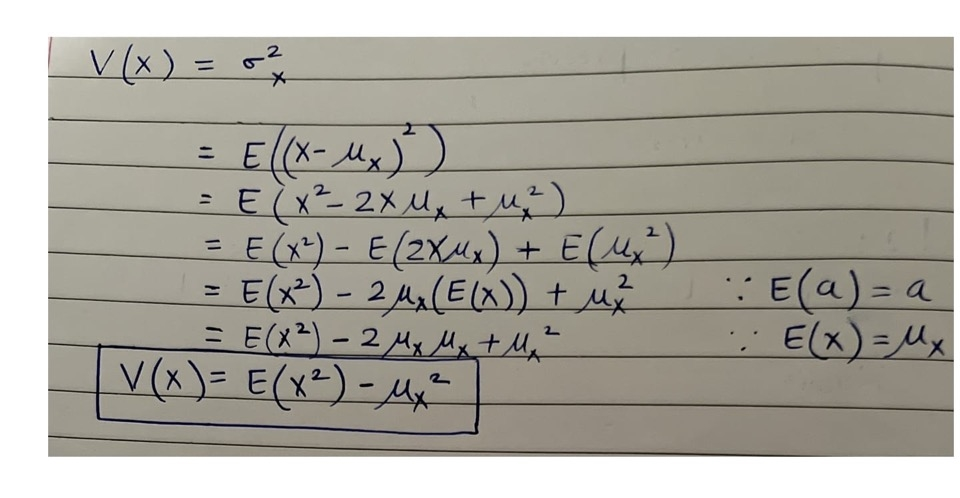



> Variance for a Knn Model 



In [41]:
(np.sum((np.asarray(y_pred_knn))**2)/199) - (np.mean((np.asarray(y_pred_knn))))**2

3.135116094522658



> Variance for a Decision Tree Model



In [42]:
(np.sum((np.asarray(y_pred_dt))**2)/199) - (np.mean((np.asarray(y_pred_dt))))**2

7.6506599007537375

Conclusion:
We know that the Knn Algorithm is a lazy learner whereas the decision tree is a very greedy algorithm and is more likely to overfit the data.
The results above are also in line with this as the variance of the decision tree is more than the variance of a Knn Model.
Hence, We can say that the decision tree is a high variance model.